In [1]:
#导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
#导入数据集，地址不要包含中文
data =pd.read_csv(r"D:\2022CDA\data.csv")

In [3]:
#查看数据结构信息  info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#筛选特征,inplace  覆盖原表,axis=1对列删除
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [7]:
#处理缺失值
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [8]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [9]:
#只要有缺失值的行就删除
data=data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [11]:
labels=data["Embarked"].unique().tolist()

In [12]:
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
#  将原始数据中的Embarked的值转化成数值，一般选择将其去重后，选择其index索引进行赋值

D:\Temp/ipykernel_18980/1999411579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))


In [13]:
labels.index("S")

0

In [14]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [15]:
data.loc[:,"Sex"]=(data["Sex"]=="male").astype("int")
#布尔值进行类型转换astype
#loc  文字索引  行列
#iloc  数字索引

D:\LeStoreDownload\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [16]:
data["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [17]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [18]:
#分离特征和标签
x=data.iloc[:,data.columns !="Survived"]

In [19]:
y=data.iloc[:,data.columns=="Survived"]

In [20]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3)

In [21]:
data.columns!="Survived"

array([ True, False,  True,  True,  True,  True,  True,  True,  True])

In [22]:
Xtrain
#索引会变乱

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
333,334,3,1,16.000000,2,0,18.0000,0
718,719,3,1,29.699118,0,0,15.5000,2
416,417,2,0,34.000000,1,1,32.5000,0
759,760,1,0,33.000000,0,0,86.5000,0
556,557,1,0,48.000000,1,0,39.6000,1
...,...,...,...,...,...,...,...,...
629,630,3,1,29.699118,0,0,7.7333,2
21,22,2,1,34.000000,0,0,13.0000,0
289,290,3,0,22.000000,0,0,7.7500,2
27,28,1,1,19.000000,3,2,263.0000,0


In [23]:
Xtrain.index=range(Xtrain.shape[0])
#将索引转换成0-622的数字，也叫索引恢复

In [24]:
for i in[Xtrain,Xtest,Ytrain,Ytest]:
    i.index=range(i.shape[0])

In [25]:
Ytest

,Survived
0,0
1,0
2,0
3,1
4,1
...,...
262,0
263,1
264,0
265,0


In [26]:
clf=DecisionTreeClassifier(random_state=25)
clf=clf.fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)
score

0.7415730337078652

In [27]:
clf=DecisionTreeClassifier(random_state=25)
score=cross_val_score(clf,x,y,cv=10).mean()

score

0.7469611848825333

0.8166624106230849


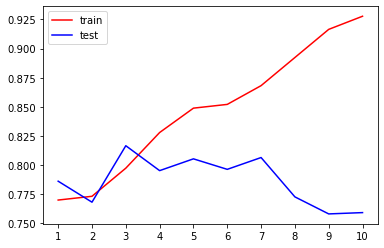

In [37]:
tr=[]
te=[]
for i in range(10):
    clf=DecisionTreeClassifier(random_state=25
                              ,max_depth=i+1
                              ,criterion="entropy")
    clf=clf.fit(Xtrain,Ytrain)
    score_tr=clf.score(Xtrain,Ytrain)
    score_te=cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()
#随着树的加深，过拟合情况越来越严重,改变不纯度的计算

In [29]:
#网格搜索寻找调参，能够帮助我们寻找调整多个参数的技术，枚举的技术，计算量大，依次参数寻找，所以一定界定范围

In [32]:
import numpy as np
gini_threholds = np.linspace(0,0.5,20)
#entropy_threholds = np.linspace(0,1,50)
#与np.arange(0,0.5,0.01)生成的数组是不一样的，步长间距

In [34]:

#一串参数以及参数对应的，我们希望网格搜索来搜索的参数的取值范围
parameters={
    "criterion":("gini","entropy")
    ,"splitter":("best","random")
    ,"max_depth":[*range(1,10)]
    ,"min_samples_leaf":[*range(1,50,5)]
    ,"min_impurity_decrease":[*np.linspace(0,0.5,20)]
}

clf = DecisionTreeClassifier(random_state=25)
#Grid是同时满足了fit,score 交叉验证三种功能的模型，将其实例化
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)

In [35]:
GS.best_params_ #从我们输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'gini',
 'max_depth': 7,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [36]:
GS.best_score_ #网格搜索后的模型的评判标准
#还没上面交叉验证的0.81分数高，因为网格搜索不会舍弃参数

0.8053763440860214